In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import numpy as np
import GenerateData as gd

In [2]:
!dolfin-convert data/mesh/DD.msh data/mesh/DD.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 161 vertices
Found all vertices
Expecting 270 cells
Found all cells
Conversion done


In [3]:
mesh_load = gd.MeshLoader("data/mesh/DD")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face

In [4]:
tags = {'walls':[5,6]}
mesh_load.update_tags(tags)

In [5]:
heat = gd.Heat(mesh_load,'Heat')

Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


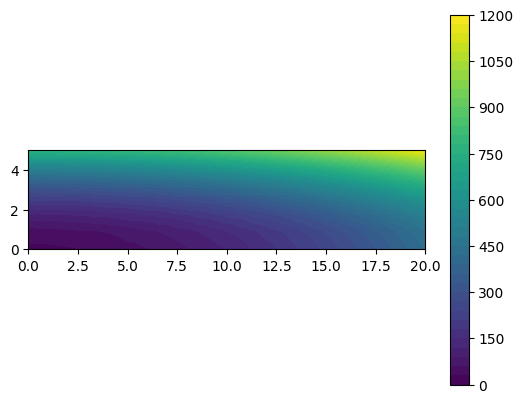

In [6]:
heat.solve()
heat.plot_solution()

In [7]:
# #Load mesh
# meshfile = "data/mesh/DD" 
# mesh = Mesh(meshfile + ".xml")
# bounds = MeshFunction("size_t", mesh, meshfile + "_facet_region.xml")
# face = MeshFunction("size_t", mesh, meshfile + "_physical_region.xml")

In [8]:
#Timevariables

alpha = 30
beta = 12
dt=Constant(0.3)
t=float(dt)
T=1.8
g_expr='1+x[0]*x[0]+alpha*x[1]*x[1]+beta*t'
g=Expression(g_expr,alpha=alpha,beta=beta,t=0,degree=2)
print(g._cpp_object)

In [9]:
n = FacetNormal(mesh_load.mesh)
h = mesh_load.mesh.hmin()

Solving linear variational problem.


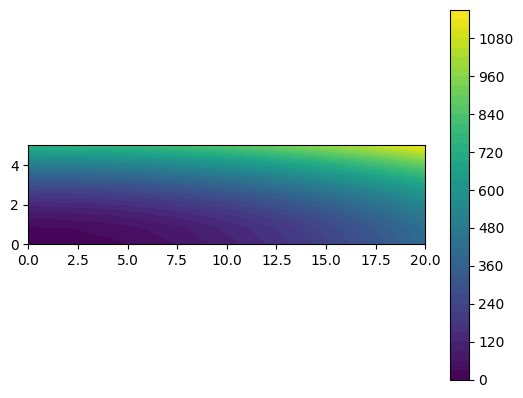

Solving linear variational problem.


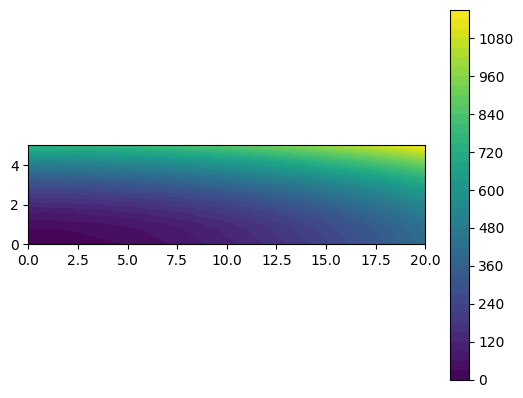

Solving linear variational problem.


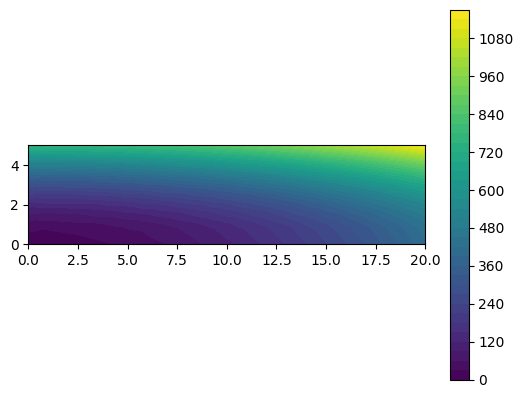

Solving linear variational problem.


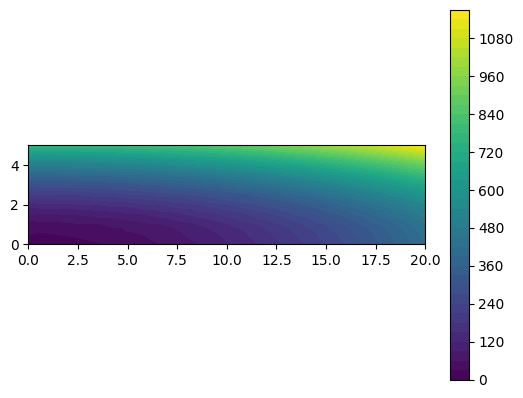

Solving linear variational problem.


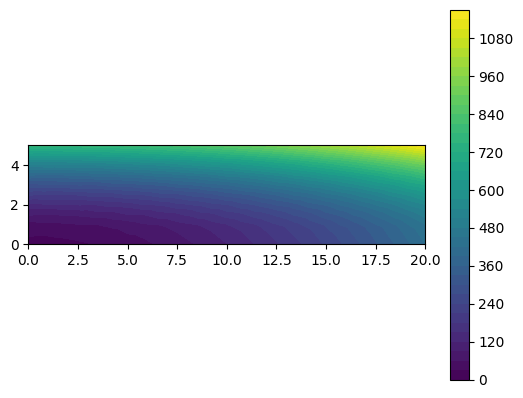

Solving linear variational problem.


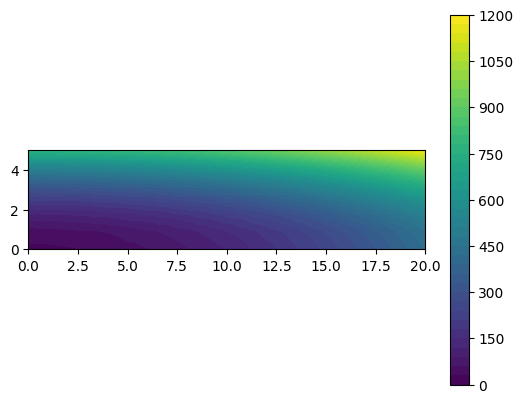

In [10]:

V = FunctionSpace(mesh_load.mesh,"CG",1)
u0 =interpolate(g,V)
u1 = Function(V)


#Variationalproblemateachtime
u=TrialFunction(V)
v=TestFunction(V)
f=Constant(beta - 2 - 2*alpha)
a_int=u*v*dx+dt*inner(grad(u),grad(v))*dx 
#a_facet = 10/avg(h)*dot(jump(v,n),jump(u,n))*dS - dot(avg(grad(v)), jump(u, n))*dS - dot(jump(u, n), avg(grad(v)))*dS
a = a_int # + a_facet
L=u0*v*dx+dt*f*v*dx

bc_x=DirichletBC(V,g,mesh_load.bounds,5)
bc_xtreme=DirichletBC(V,g,mesh_load.bounds,6)
bcs = [bc_x,bc_xtreme]


while(t<=T):
    #Solve
    g.t=t
    solve(a==L,u1,bcs)
    #Update
    u0.assign(u1)
    
    sol = plot(u1)
    plot(u1)
    plt.colorbar(sol)
    plt.show()

    t+=float(dt)

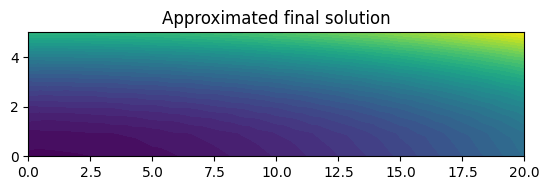

In [11]:

plot(u1,title="Approximated final solution")

In [12]:

equation = 'heat'
tags = {'walls' : [5,6], 'interfaces' : [7]}
mesh_load.update_tags(tags)

In [13]:
# rename_boundaries = MeshFunction("size_t", mesh,1)
# rename_boundaries.set_all(0)
# rename_boundaries.array()[bounds.array()==5] = 1 # horizontal boundaries
# rename_boundaries.array()[bounds.array()==6] = 2 # vertical boundaries
# rename_boundaries.array()[bounds.array()==7] = 3 # interfaces

dS = Measure("dS",domain=mesh_load.mesh, subdomain_data=mesh_load.rename_boundaries)
ds2 = Measure("ds",domain=mesh_load.mesh, subdomain_data=mesh_load.rename_boundaries)

In [14]:
# rename_faces = MeshFunction("size_t", mesh, 2)
# rename_faces.set_all(0)
# n_tags = len(np.unique(face.array()))
# for i in range(n_tags):
#     rename_faces.array()[face.array()==8+i] = i

dx1 = Measure("dx",domain=mesh_load.mesh, subdomain_data=mesh_load.rename_faces)

In [15]:
dS, ds, dx = mesh_load.measure_definition()

In [16]:
print(mesh_load.rename_boundaries.array())

[5 6 0 5 6 0 5 5 7 0 0 5 5 7 0 0 5 5 7 0 0 5 5 7 0 0 5 5 7 0 0 5 5 7 0 0 5
 6 0 5 6 0 5 0 0 5 0 0 5 0 0 0 0 5 0 0 5 0 0 5 0 0 0 0 5 0 0 5 0 0 5 0 0 0
 0 5 0 0 5 0 0 5 0 0 0 0 5 0 0 5 0 0 5 0 0 0 0 5 0 0 5 0 0 5 0 0 0 0 5 0 0
 5 0 0 5 0 0 0 0 5 0 0 5 0 0 5 0 0 0 0 6 0 0 6 0 0 6 0 0 0 0 7 0 0 0 0 7 0
 0 0 0 7 0 0 0 0 0 0 0 0 7 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 0 0 0 7 0 0 0 0 7
 0 0 0 0 7 0 0 0 0 0 0 0 0 6 0 0 6 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
flux = assemble(-dot(grad(u1)('+'), n('+')) * dS(7))
flux

-402.5183552262896

In [18]:
u_dom1 = assemble(u1*dx1(0))
u_dom1

40959.51405787838

In [19]:
file = File ("output.pvd")
file << u1

In [20]:
equation = 'heat'
tags = {'walls' : [5,6], 'interfaces' : [7]}